TEST TITLE

In [1]:
import pandas as pd

raw_df = pd.read_csv('PATH_TO_FILE\raw_data.csv')
raw_df.head(5)

,Country Name,Country Code,Energy use (kg of oil equivalent per capita) 2015,"GDP per capita, PPP (current international $) 2015",CO2 per capita (ton CO2/cap) 2015
0,Curacao,CUW,12650.9,27947.8,46.7
1,Qatar,QAT,17922.7,123822.1,39.4
2,Trinidad and Tobago,TTO,14363.5,33698.7,26.7
3,Bahrain,BHR,10596.6,46912.0,24.6
4,Kuwait,KWT,9178.9,75042.1,24.3


In [3]:
raw_df = raw_df.rename(columns={"Country Name":"name","Country Code":"code","Energy use (kg of oil equivalent per capita) 2015":"energy_pc","GDP per capita, PPP (current international $) 2015":"gdp_pc" ,"CO2 per capita (ton CO2/cap) 2015":"co2_pc"})
raw_df.describe()

,energy_pc,gdp_pc,co2_pc
count,165.000000,165.000000,165.000000
mean,2269.999394,20944.746667,5.310909
std,2913.174250,20850.715769,6.762432
min,9.600000,867.100000,0.100000
25%,565.400000,6082.800000,1.000000
50%,1262.400000,14006.200000,3.200000
75%,2764.000000,29397.100000,6.800000
max,17922.700000,123822.100000,46.700000


In [4]:
raw_df.dtypes

name          object
code          object
energy_pc    float64
gdp_pc       float64
co2_pc       float64
dtype: object

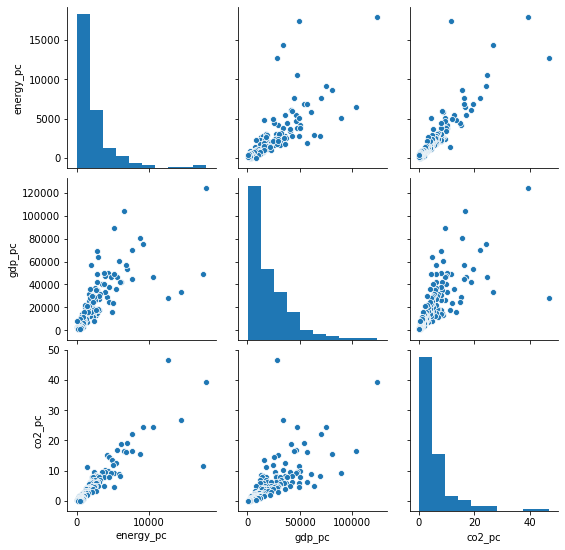

In [5]:
energy = raw_df['energy_pc']
gdp = raw_df['gdp_pc']
co2 = raw_df['co2_pc']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.pairplot(raw_df)

In [6]:
raw_df.corr()*raw_df.corr()

,energy_pc,gdp_pc,co2_pc
energy_pc,1.000000,0.564608,0.789825
gdp_pc,0.564608,1.000000,0.500032
co2_pc,0.789825,0.500032,1.000000


In [7]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(raw_df[['energy_pc', 'gdp_pc', 'co2_pc']])
std = std_scale.transform(raw_df[['energy_pc', 'gdp_pc', 'co2_pc']])
raw_df_std = pd.DataFrame(data = std)

minmax_scale = preprocessing.MinMaxScaler().fit(raw_df[['energy_pc', 'gdp_pc', 'co2_pc']])
minmax = minmax_scale.transform(raw_df[['energy_pc', 'gdp_pc', 'co2_pc']])
raw_df_minmax = pd.DataFrame(data = minmax)

In [8]:
print(raw_df_std)
print(type(raw_df_std))

            0         1         2
0    3.574280  0.336889  6.139076
1    5.389430  4.949016  5.056297
2    4.163951  0.613541  3.172557
3    2.866958  1.249180  2.861073
4    2.378825  2.602406  2.816575
..        ...       ...       ...
160 -0.736830 -0.900012 -0.758080
161 -0.700229 -0.906401 -0.772913
162 -0.611810 -0.929554 -0.772913
163 -0.729944 -0.961155 -0.772913
164 -0.647549 -0.965855 -0.772913

[165 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [9]:
raw_df_std = raw_df_std.rename(columns={0:"energy_pc",1:"gdp_pc",2:"co2_pc"})
raw_df_minmax = raw_df_minmax.rename(columns={0:"energy_pc",1:"gdp_pc",2:"co2_pc"})
raw_df_std.head(5)

,energy_pc,gdp_pc,co2_pc
0,3.574280,0.336889,6.139076
1,5.389430,4.949016,5.056297
2,4.163951,0.613541,3.172557
3,2.866958,1.249180,2.861073
4,2.378825,2.602406,2.816575


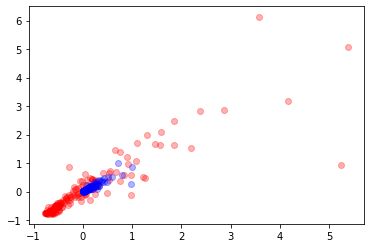

In [10]:
#strongest relationship energy&co2, lmm vs zscore
plt.scatter(raw_df_std['energy_pc'], raw_df_std['co2_pc'], color='red',label='Standardized', alpha=0.3)
plt.scatter(raw_df_minmax['energy_pc'], raw_df_minmax['co2_pc'], color='blue',label='Normalised', alpha=0.3)

(0, 1)

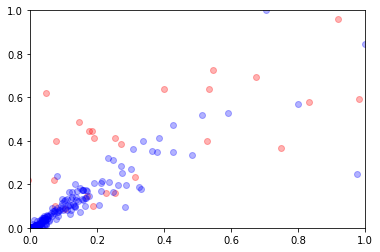

In [11]:
#strongest relationship energy&co2, lmm vs zscore
plt.scatter(raw_df_std['energy_pc'], raw_df_std['co2_pc'], color='red',label='Standardized', alpha=0.3)
plt.scatter(raw_df_minmax['energy_pc'], raw_df_minmax['co2_pc'], color='blue',label='Normalised', alpha=0.3)
plt.xlim(0,1)
plt.ylim(0,1)

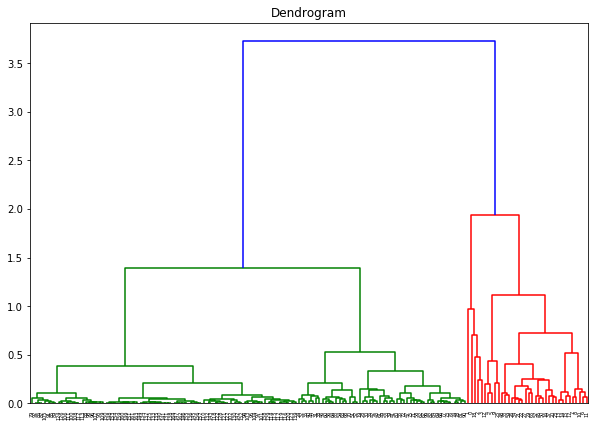

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(raw_df_minmax, method='ward'))
#plt.axhline(y=2, color='r', linestyle='--')

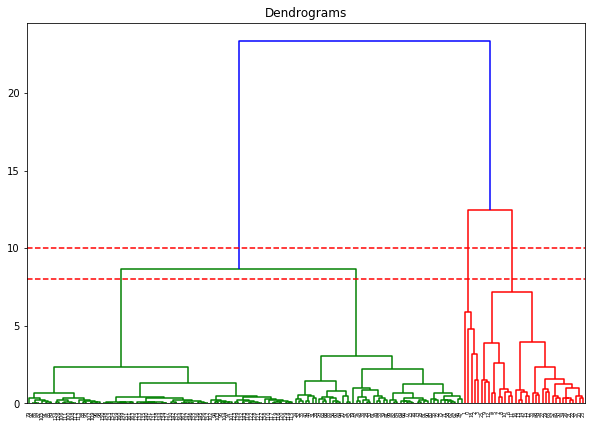

In [16]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(raw_df_std, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.axhline(y=8, color='r', linestyle='--')

In [17]:
#agglomerative clustering on standardised dataset with two clusters

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(raw_df_std)

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
#agglomerative clustering on standardised dataset with three clusters

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(raw_df_std)

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
#agglomerative clustering on standardised dataset with four clusters

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(raw_df_std)

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

[[0.06579995 0.09781249 0.06068735]
 [0.36773494 0.42521324 0.31636104]]


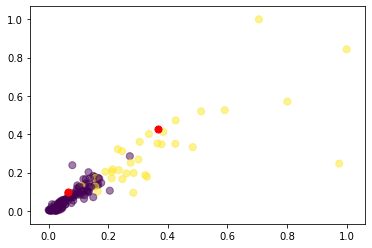

In [21]:
##KMeans with 2 clusters and plot

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(raw_df_minmax)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(raw_df_minmax['energy_pc'], raw_df_minmax['co2_pc'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

[[ 0.30588932  0.65480555  0.35835755]
 [-0.51347431 -0.59795738 -0.52639529]
 [ 2.72624509  1.98044996  2.61576432]]


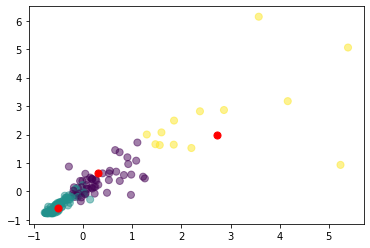

In [22]:
##KMeans with 3 clusters and plot

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=100).fit(raw_df_std)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(raw_df_std['energy_pc'], raw_df_std['co2_pc'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [23]:
kmeans.inertia_

134.77183089684667

Text(0.5, 1.0, 'Investigation of optimal n clusters with elbow method')

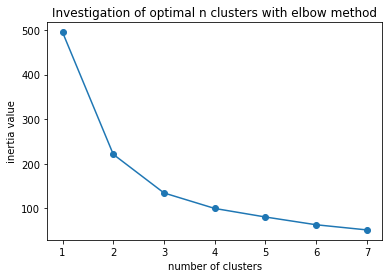

In [24]:
##elbow method. Calculate model inertia (spread outedness) for several different number of clusters

inertias = []
ks = range(1,8)

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', n_init=50).fit(raw_df_std)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia value')
plt.title('Investigation of optimal n clusters with elbow method')


In [25]:
#trying to print the output of kmeans

print(kmeans.labels_)

[2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
#appending kmeans labels to df
raw_df_std['3_cluster_knn_label'] = kmeans.labels_
raw_df_std

,energy_pc,gdp_pc,co2_pc,3_cluster_knn_label
0,3.574280,0.336889,6.139076,2
1,5.389430,4.949016,5.056297,2
2,4.163951,0.613541,3.172557,2
3,2.866958,1.249180,2.861073,2
4,2.378825,2.602406,2.816575,2
...,...,...,...,...
160,-0.736830,-0.900012,-0.758080,1
161,-0.700229,-0.906401,-0.772913,1
162,-0.611810,-0.929554,-0.772913,1
163,-0.729944,-0.961155,-0.772913,1


In [28]:
###Adding labels to original dataset

raw_df['3_cluster_knn_label'] = kmeans.labels_
raw_df

,name,code,energy_pc,gdp_pc,co2_pc,3_cluster_knn_label
0,Curacao,CUW,12650.9,27947.8,46.7,2
1,Qatar,QAT,17922.7,123822.1,39.4,2
2,Trinidad and Tobago,TTO,14363.5,33698.7,26.7,2
3,Bahrain,BHR,10596.6,46912.0,24.6,2
4,Kuwait,KWT,9178.9,75042.1,24.3,2
...,...,...,...,...,...,...
160,Solomon Islands,SLB,130.0,2235.8,0.2,1
161,Eritrea,ERI,236.3,2103.0,0.1,1
162,Ethiopia,ETH,493.1,1621.7,0.1,1
163,Niger,NER,150.0,964.8,0.1,1


In [29]:
#investigating mean min max values of clusters
raw_df.groupby(['3_cluster_knn_label']).mean()

,energy_pc,gdp_pc,co2_pc
3_cluster_knn_label,,,
0,3158.403846,34556.475000,7.726923
1,778.699000,8514.746000,1.762000
2,10187.923077,62113.223077,22.946154


In [30]:
raw_df.groupby(['3_cluster_knn_label'])[['energy_pc', 'gdp_pc', 'co2_pc']].min()

,energy_pc,gdp_pc,co2_pc
3_cluster_knn_label,,,
0,1438.8,13185.3,3.0
1,9.6,867.1,0.1
2,6040.6,27947.8,11.6


In [31]:
raw_df.groupby(['3_cluster_knn_label'])[['energy_pc', 'gdp_pc', 'co2_pc']].max()

,energy_pc,gdp_pc,co2_pc
3_cluster_knn_label,,,
0,5924.7,89007.5,16.9
1,2694.2,22237.1,6.8
2,17922.7,123822.1,46.7


In [39]:
print('percent in cluster 1 (low emitters) = ')
print((raw_df[raw_df['3_cluster_knn_label']==1].count()['name']/165)*100)

print('percent in cluster 0 (mid emitters)= ')
print((raw_df[raw_df['3_cluster_knn_label']==0].count()['name']/165)*100)

print('percent in cluster 2 (high emitters)= ')
print((raw_df[raw_df['3_cluster_knn_label']==2].count()['name']/165)*100)

percent in cluster 1 (low emitters) = 
60.60606060606061
percent in cluster 0 (mid emitters)= 
31.515151515151512
percent in cluster 2 (high emitters)= 
7.878787878787878


In [41]:
##function to add in labels for 3 cluster

def func(row):
    if row['3_cluster_knn_label'] == 0:
        val = "mid_Kaya"
    elif row['3_cluster_knn_label'] == 2:
        val = "high_Kaya"
    else:
        val = "low_Kaya"
    return val

raw_df['Kaya_label'] = raw_df.apply(func, axis=1)

print(raw_df)

                    name code  energy_pc    gdp_pc  co2_pc  \
0                Curacao  CUW    12650.9   27947.8    46.7   
1                  Qatar  QAT    17922.7  123822.1    39.4   
2    Trinidad and Tobago  TTO    14363.5   33698.7    26.7   
3                Bahrain  BHR    10596.6   46912.0    24.6   
4                 Kuwait  KWT     9178.9   75042.1    24.3   
..                   ...  ...        ...       ...     ...   
160      Solomon Islands  SLB      130.0    2235.8     0.2   
161              Eritrea  ERI      236.3    2103.0     0.1   
162             Ethiopia  ETH      493.1    1621.7     0.1   
163                Niger  NER      150.0     964.8     0.1   
164     Congo, Dem. Rep.  COD      389.3     867.1     0.1   

     3_cluster_knn_label Kaya_label  
0                      2  high_Kaya  
1                      2  high_Kaya  
2                      2  high_Kaya  
3                      2  high_Kaya  
4                      2  high_Kaya  
..                   ...   

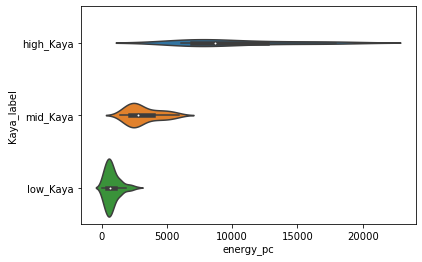

In [42]:
###visualising distribution of samples in each cluster for a given variable

import seaborn as sns
sns.violinplot(y=raw_df["Kaya_label"], x=raw_df["energy_pc"])

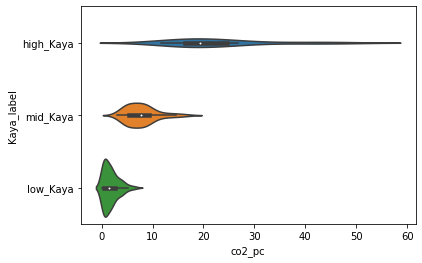

In [43]:
sns.violinplot( y=raw_df["Kaya_label"], x=raw_df["co2_pc"] )

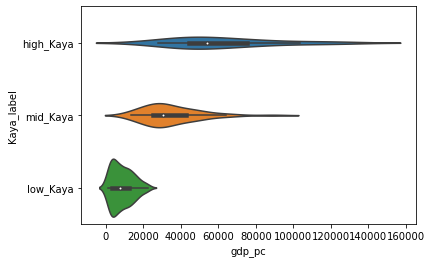

In [44]:
sns.violinplot( y=raw_df["Kaya_label"], x=raw_df["gdp_pc"] )

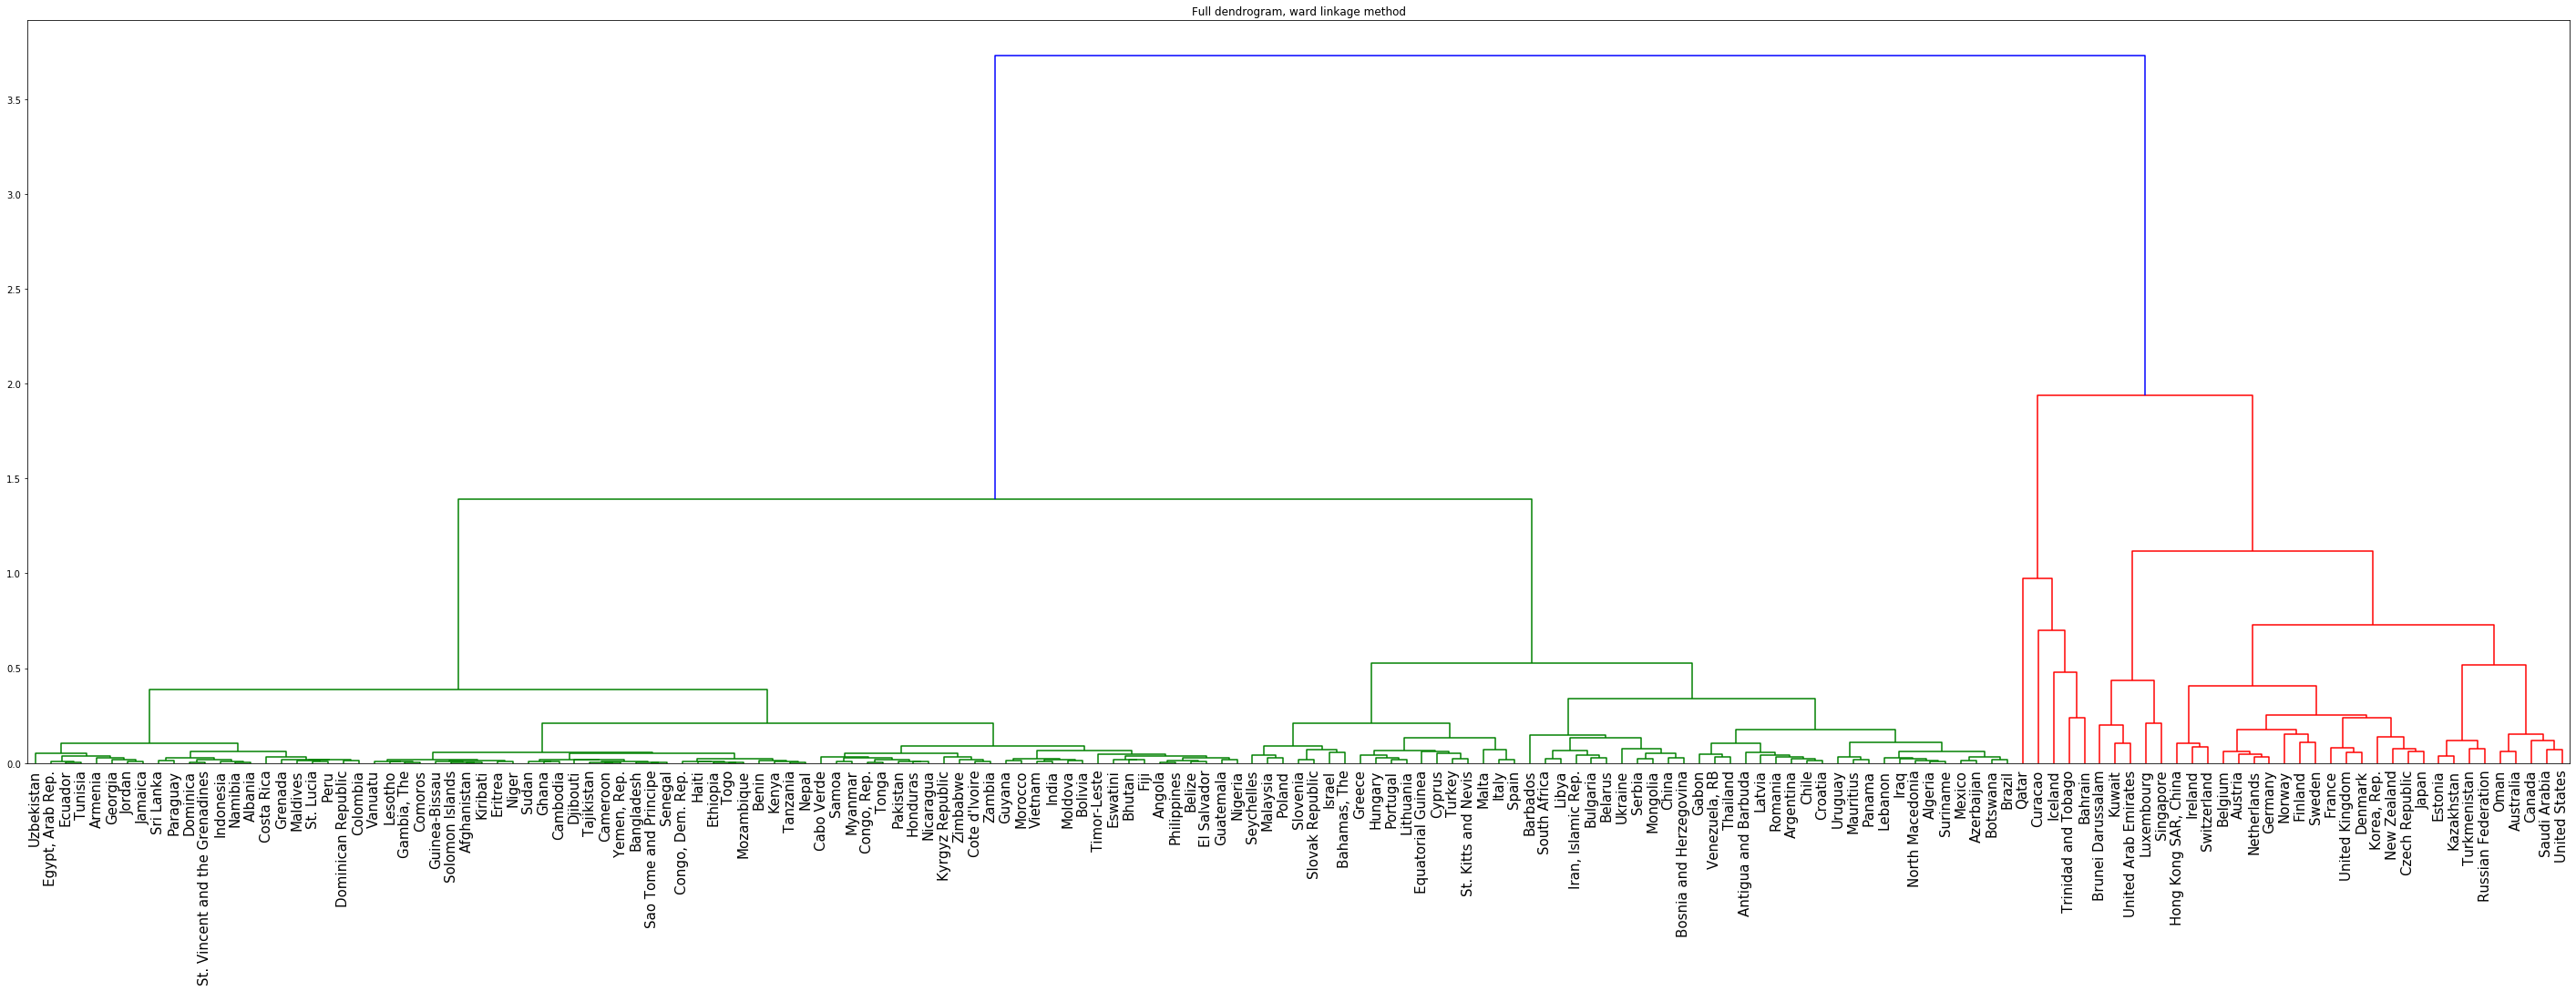

In [45]:
dendro_df = pd.DataFrame({'labels': raw_df['name'], 'energy':raw_df_minmax['energy_pc'], 'gdp':raw_df_minmax['gdp_pc'], 'co2':raw_df_minmax['co2_pc']})

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(50, 15))  
plt.title("Full dendrogram, ward linkage method")  
dend = shc.dendrogram(shc.linkage(dendro_df[['energy', 'gdp', 'co2']], method='ward'), labels=list(dendro_df['labels']), leaf_font_size=15)